# **Restorasi**

## TES salt n pepper noise restored

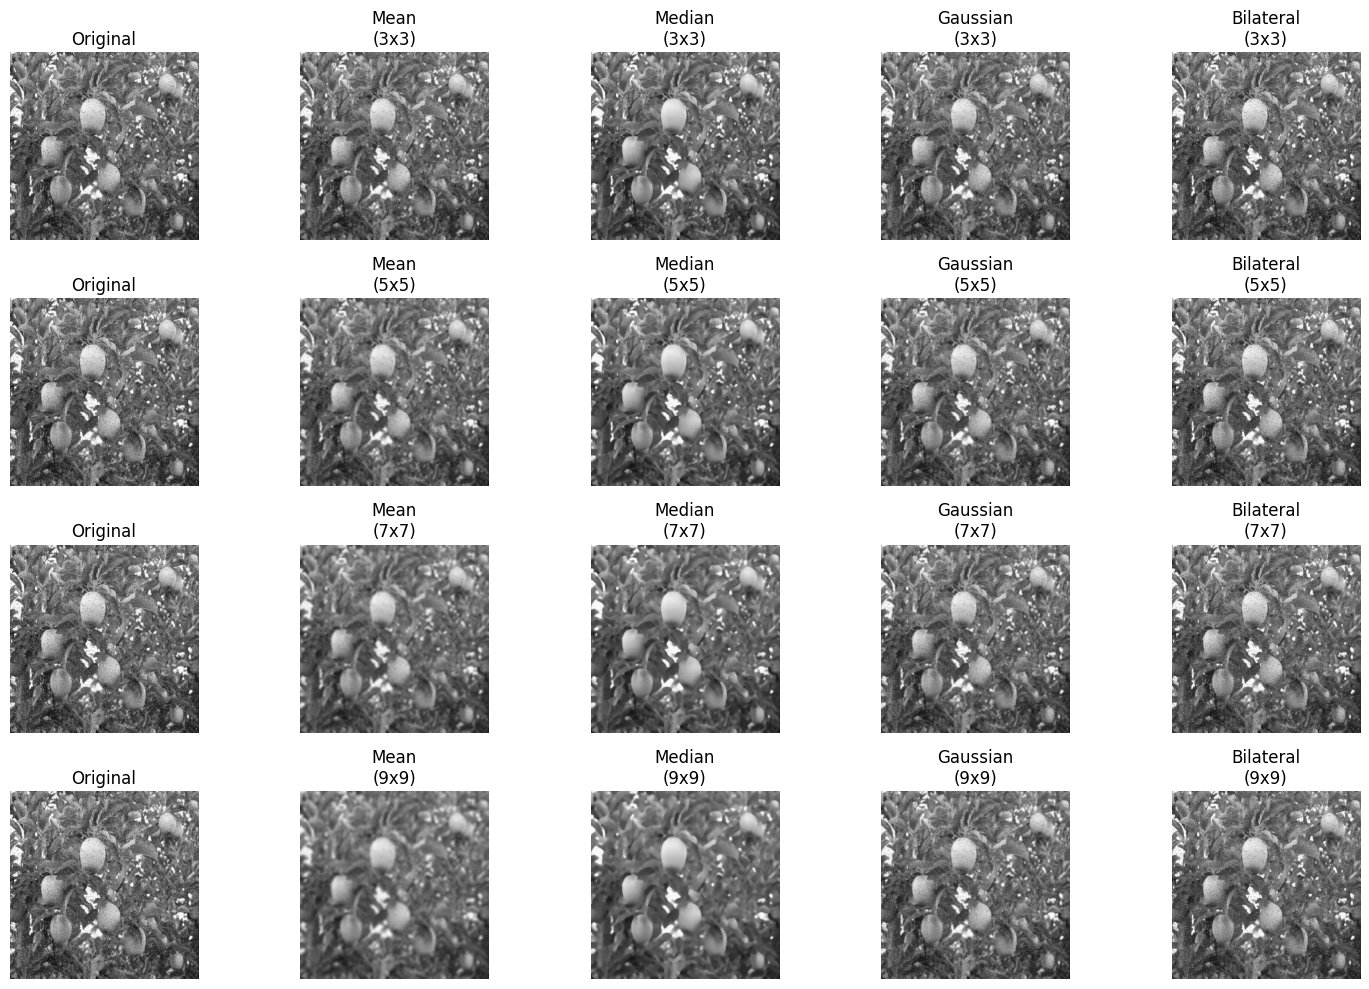

In [2]:
import cv2
import matplotlib.pyplot as plt

def mean_filter(image, filter_size=3):
    return cv2.blur(image, (filter_size, filter_size))

def median_filter(image, filter_size=3):
    return cv2.medianBlur(image, filter_size)

def gaussian_filter(image, filter_size=3, sigma=1):
    return cv2.GaussianBlur(image, (filter_size, filter_size), sigma)

def bilateral_filter(image, filter_size=9, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, filter_size, sigma_color, sigma_space)

# Load gambar
image = cv2.imread('/content/fruit_apple_apple-tree_wallpaper_apple_07_png_jpg.rf.eede72f256e11421479068de352dedde.jpg')

# Ukuran filter yang akan dicoba
filter_sizes = [3, 5, 7, 9]

# Inisialisasi subplot
num_rows = len(filter_sizes)
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop melalui semua jenis filter dan semua ukuran filter
for i, filter_size in enumerate(filter_sizes):
    # Menampilkan gambar asli di kolom pertama
    axes[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title('Original')
    axes[i, 0].axis('off')

    # Loop melalui semua jenis filter
    for j, filter_type in enumerate([mean_filter, median_filter, gaussian_filter, bilateral_filter]):
        # Menerapkan filter
        filtered_image = filter_type(image, filter_size=filter_size)

        # Menampilkan gambar yang telah difilter
        axes[i, j+1].imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
        filter_name = filter_type.__name__.replace('_filter', '').capitalize()
        axes[i, j+1].set_title(f'{filter_name}\n({filter_size}x{filter_size})')
        axes[i, j+1].axis('off')

plt.tight_layout()
plt.show()

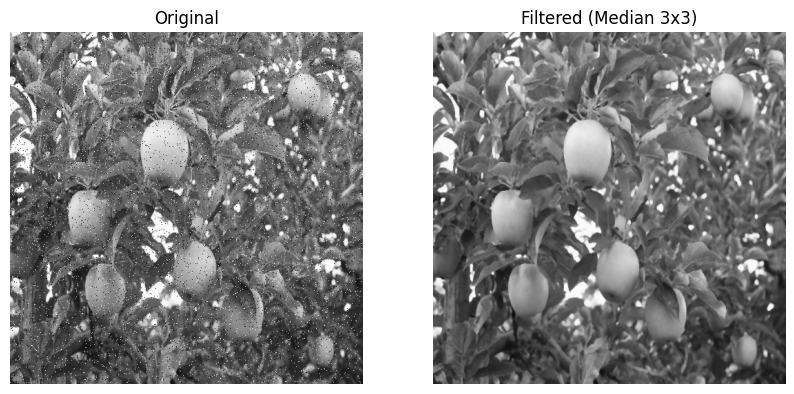

In [25]:
import cv2
import matplotlib.pyplot as plt

def median_filter(image, filter_size=5):
    return cv2.medianBlur(image, filter_size)

# Load gambar
image_path = '/content/fruit_apple_apple-tree_wallpaper_apple_07_png_jpg.rf.eede72f256e11421479068de352dedde.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Terapkan median filter
filtered_image = median_filter(image, filter_size=3)

# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered (Median 3x3)')
plt.axis('off')

plt.show()

## salt n pepper noise restored

In [52]:
import cv2
import os
import pandas as pd

def median_filter(image, filter_size=3):
    return cv2.medianBlur(image, filter_size)

def process_images_with_csv(input_dir, output_dir, filter_funcs, csv_file, csv_output):
    # Membaca file CSV yang berisi informasi kelas-kelas gambar dan nama file
    df = pd.read_csv(csv_file)

    # Membuat direktori output untuk menyimpan gambar yang telah difilter
    for filter_func in filter_funcs:
        filter_name = filter_func.__name__.replace('_', '')
        filter_output_dir = os.path.join(output_dir, filter_name)

        if not os.path.exists(filter_output_dir):
            os.makedirs(filter_output_dir)

    # Membuat DataFrame baru untuk menyimpan informasi hasil pengolahan gambar
    processed_df = pd.DataFrame(columns=['filename'] + list(df.columns[1:]))

    # Looping melalui file gambar dalam direktori input
    for filename in os.listdir(input_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                for filter_func in filter_funcs:
                    filtered_image = filter_func(image)
                    filter_name = filter_func.__name__.replace('_', '')
                    filter_output_path = os.path.join(output_dir, filter_name, filename)
                    if cv2.imwrite(filter_output_path, filtered_image):
                        print(f"Saved filtered image to {filter_output_path}")
                    else:
                        print(f"Failed to save filtered image to {filter_output_path}")

                    # Menyimpan informasi hasil pengolahan gambar ke DataFrame
                    class_label = None
                    for col in df.columns[1:]:
                        if not df.loc[df['filename'] == filename, col].empty:
                            if df.loc[df['filename'] == filename, col].iloc[0] == 1:
                                class_label = col
                                break

                    if class_label is not None:
                        # Menambahkan baris baru ke DataFrame
                        processed_df.loc[len(processed_df)] = [filename] + [0] * (len(df.columns) - 1)
                        # Menetapkan nilai kelas yang sesuai menjadi 1
                        processed_df.loc[processed_df['filename'] == filename, class_label] = 1

    print("Processed images with filters")

    # Simpan DataFrame hasil pengolahan gambar ke file CSV baru
    processed_csv_file = os.path.join(output_dir, csv_output)
    processed_df.to_csv(processed_csv_file, index=False)
    print(f"Processed CSV file saved as: {processed_csv_file}")

### Train_Salt Restored

In [49]:
# Ganti 'path_to_input_dir' dan 'path_to_output_dir' dengan path yang sesuai
input_dir = r'/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainAddnoise/train_salt'
output_dir = r'/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/train_salt_restored'
csv_file = r'/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainAddnoise/train_salt/_classes.csv'
csv_output = '/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/train_salt_restored/_classes.csv'

# Daftar fungsi filter yang tersedia
filter_funcs = [median_filter]

process_images_with_csv(input_dir, output_dir, filter_funcs, csv_file, csv_output)

Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/train_salt_restored/medianfilter/Gatton1_valid_20141204T1614_frame0014_png_jpg.rf.7a338ec82da6387e808b7b96e23e5920.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/train_salt_restored/medianfilter/Gatton1_train_20141204T1836_frame0004_png_jpg.rf.1c0b38c241cc2f47a0ccbcc20184797a.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/train_salt_restored/medianfilter/Gatton1_valid_20141204T1614_frame0001_png_jpg.rf.f05549d4ff5e45e5a6471776b81089b0.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/train_salt_restored/medianfilter/Gatton1_test_20141204T1836_frame0035_png_jpg.rf.b2bb347adfcf6dd7134c86f49cf72771.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_p

### Test_Salt Restored

In [51]:
# Ganti 'path_to_input_dir' dan 'path_to_output_dir' dengan path yang sesuai
input_dir = r'/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainAddnoise/test_salt'
output_dir = r'/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/test_salt_restored'
csv_file = r'/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainAddnoise/test_salt/_classes.csv'
csv_output = '/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/test_salt_restored/_classes.csv'

# Daftar fungsi filter yang tersedia
filter_funcs = [median_filter]

process_images_with_csv(input_dir, output_dir, filter_funcs, csv_file, csv_output)

Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/test_salt_restored/medianfilter/Stanthorpe1_train_20150319T1824_pic000328_png_jpg.rf.aeb160e3b79c27a49e3a228526efe169.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/test_salt_restored/medianfilter/Gatton2_train_20150429T1823_pic000159_png_jpg.rf.0200f2a0fd5d0501d4d247da3f21d096.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/test_salt_restored/medianfilter/2844-960x960_png_jpg.rf.f46f17a5ae56c71bc0f1107ef8750fb1.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/test_salt_restored/medianfilter/8_png_jpg.rf.0393f9ec86426f2e6a40ec95709bc0f8.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/test_salt_restored/medianfilter/Stanthorpe2_t

### Valid_Salt Restored

In [53]:
# Ganti 'path_to_input_dir' dan 'path_to_output_dir' dengan path yang sesuai
input_dir = r'/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainAddnoise/valid_salt'
output_dir = r'/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/valid_salt_restored'
csv_file = r'/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainAddnoise/valid_salt/_classes.csv'
csv_output = '/content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/valid_salt_restored/_classes.csv'

# Daftar fungsi filter yang tersedia
filter_funcs = [median_filter]

process_images_with_csv(input_dir, output_dir, filter_funcs, csv_file, csv_output)

Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/valid_salt_restored/medianfilter/20151125T1143_pic000294_png_jpg.rf.73c7c19f5f024986daa6995719c6b1ae.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/valid_salt_restored/medianfilter/20151125T1138_pic000461_png_jpg.rf.bc4dbcd74c15335fec68d9b0337146be.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/valid_salt_restored/medianfilter/20151125T1138_pic000392_png_jpg.rf.eada243175bdfb986dfec1d4ccfc35bf.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/valid_salt_restored/medianfilter/Bonsai-tree_png_jpg.rf.e2341e1c82d3b09f64a8bbb002dff98a.jpg
Saved filtered image to /content/drive/MyDrive/TUGASS/Semester 6/PCD/trainrestored/salt_and_pepper_restored/valid_salt_restored/medianfilter/20151125T1138_pic00